In [1]:
import spartan2.ioutil as ioutil
import spartan2.basicutil as iatutil
import spartan2.drawutil as drawutil

## extracttimes function
extract time stamps in log files or edgelist tensor

groupids: the group col idx used for aggregating timestamps
aggts: dict whose key is an integer(user id) and value is a list of integers(timestamp list)

In [4]:
infile = '/home/liushenghua/Data/wbcovid19rummor/renameoppuid/*.reid.reid.gz'
#outfile = '../output/agg.ts'
#aggts = ioutil.extracttimes(infile, outfile=None, timeidx=0, timeformat='%Y-%m-%d %H:%M:%S', delimeter='\x01',
#                        isbyte=True, comments='#', nodetype=str, groupids=[1])

	processing file 000000_0.reid.reid.gz
	processing file 000001_0.reid.reid.gz
	processing file 000002_0.reid.reid.gz
	processing file 000003_0.reid.reid.gz
	processing file 000004_0.reid.reid.gz
	processing file 000005_0.reid.reid.gz
	processing file 000006_0.reid.reid.gz
	processing file 000007_0.reid.reid.gz
	processing file 000008_0.reid.reid.gz
	processing file 000009_0.reid.reid.gz
	processing file 000010_0.reid.reid.gz
	processing file 000011_0.reid.reid.gz
	processing file 000012_0.reid.reid.gz
	processing file 000013_0.reid.reid.gz
	processing file 000014_0.reid.reid.gz
	processing file 000015_0.reid.reid.gz
	processing file 000016_0.reid.reid.gz
	processing file 000017_0.reid.reid.gz
	processing file 000018_0.reid.reid.gz
	processing file 000019_0.reid.reid.gz
	processing file 000020_0.reid.reid.gz
	processing file 000021_0.reid.reid.gz
	processing file 000022_0.reid.reid.gz
	processing file 000023_0.reid.reid.gz
	processing file 000024_0.reid.reid.gz
	processing file 000025_0

In [2]:
outfile = '../output/agg.ts.gz'
aggts = ioutil.loadDictListData(outfile, ktype=int, vtype=int, delim=':')

## IAT class

calaggiat function：calculate iat dict **aggiat** (key:user, value: iat list)

caliatcount function：calculate iat count dict **iatcount** (key:iat, value: frequency)

caliatpair function：calculate iat dict **iatpaircount** (key:(iat1, iat2), value: frequency)

In [3]:
instance = iatutil.IAT()

In [4]:
# calculate aggiat dict
instance.calaggiat(aggts)
aggiat = instance.aggiat

In [6]:
instance.save_aggiat('../output/aggiat.dictlist.gz')

TypeError: memoryview: a bytes-like object is required, not 'str'

In [1]:
import pickle
f = open('../output/aggiat.pkl','wb')
pickle.dump(aggiat, f)

NameError: name 'aggiat' is not defined

In [8]:
xs, ys = instance.getiatpairs()

AttributeError: 'IAT' object has no attribute 'getiatpairs'

In [8]:
len(xs), len(ys)

(158, 158)

''

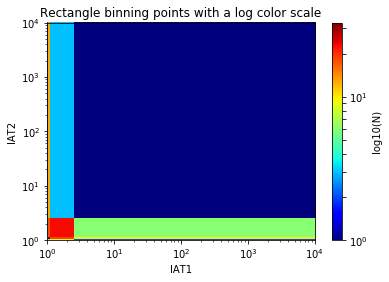

In [9]:
drawutil.drawRectbin(xs, ys, outfig='../output/iat0224.png', gridsize=60, xlabel='IATn', ylabel='IATn+1')

 ## findMaxRectbin function
    
find the bin with the largest number of samples in the range of
horizontal axis: [x-radius, x+radius]
vertical axis: [y-radius, y+radius]
    
xbinidx, ybinidx: the bin index of bins in horizontal axis and vertical axis

In [10]:
xbinidx, ybinidx = drawutil.findMaxRectbin(xs, ys, x=50,y=50, radius=100, gridsize=1000)
print(xbinidx, ybinidx)

0 0
